In [2]:
#!/usr/bin/env python
# importing

from zipfile import ZipFile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import urllib.request as urllib2
import io
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO

%matplotlib inline

# Get the Zip file from the given url
link = "https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/Downloads/DE1_0_2008_Beneficiary_Summary_File_Sample_1.zip"
r = urllib2.urlopen(link).read()
file = ZipFile(io.BytesIO(r))

# Open the file and read into a dataframe
patient_data_csv = file.open("DE1_0_2008_Beneficiary_Summary_File_Sample_1.csv")
df = pd.read_csv(patient_data_csv, encoding='utf8')

df.head()

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,...,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,00013D2EFD8E45D1,19230501,NaN,1,1,0,26,950,12,12,...,2,0.0,0.0,0.0,50.0,10.0,0.0,0.0,0.0,0.0
1,00016F745862898F,19430101,NaN,1,1,0,39,230,12,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,700.0,240.0,0.0
2,0001FDD721E223DC,19360901,NaN,2,1,0,39,280,12,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00021CA6FF03E670,19410601,NaN,1,5,0,6,290,0,0,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00024B3D2352D2D0,19360801,NaN,1,1,0,52,590,12,12,...,2,0.0,0.0,0.0,30.0,40.0,0.0,220.0,80.0,0.0


In [3]:
# How many columns and rows are in the file?

num_rows = df.shape[0]
num_cols = df.shape[1]

print(f'There are {num_rows} of rows and {num_cols} of columns in the given file.')

There are 116352 of rows and 32 of columns in the given file.


In [29]:
# What are column names?
# columns is a param

df.columns

Index(['DESYNPUF_ID', 'BENE_BIRTH_DT', 'BENE_DEATH_DT', 'BENE_SEX_IDENT_CD',
       'BENE_RACE_CD', 'BENE_ESRD_IND', 'SP_STATE_CODE', 'BENE_COUNTY_CD',
       'BENE_HI_CVRAGE_TOT_MONS', 'BENE_SMI_CVRAGE_TOT_MONS',
       'BENE_HMO_CVRAGE_TOT_MONS', 'PLAN_CVRG_MOS_NUM', 'SP_ALZHDMTA',
       'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN',
       'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA',
       'MEDREIMB_IP', 'BENRES_IP', 'PPPYMT_IP', 'MEDREIMB_OP', 'BENRES_OP',
       'PPPYMT_OP', 'MEDREIMB_CAR', 'BENRES_CAR', 'PPPYMT_CAR'],
      dtype='object')

In [30]:
# Find unique IDs

total_unique_ids = df['DESYNPUF_ID'].nunique()
print(f'There are total {total_unique_ids} unique IDs.')

There are total 116352 unique IDs.


In [17]:
# What fraction of numbers are male?
# let's use value_counts() on the series;
# this will return the count of unique occurrences in this column.

# df.shape[0] will return the number of rows
# value_counts() / number of rows will give fraction of of both genders

print(f'{df["BENE_SEX_IDENT_CD"].value_counts()}')
print(f'Unique values in BENE_SEX_IDENT_CD column are {df["BENE_SEX_IDENT_CD"].unique()}')
# df['BENE_SEX_IDENT_CD'].value_counts() / df.shape[0]
#(df['BENE_SEX_IDENT_CD'].value_counts() / df.shape[0]) * 100
df['BENE_SEX_IDENT_CD'].value_counts(normalize=True)

2    64347
1    52005
Name: BENE_SEX_IDENT_CD, dtype: int64
Unique values in BENE_SEX_IDENT_CD column are [1 2]


2    0.553037
1    0.446963
Name: BENE_SEX_IDENT_CD, dtype: float64

In [22]:
# Get fractional distribution of Race
# Both the methods below give the same output
# setting normalize=True, the object returned will contain the relative frequencies of the unique values

#df['BENE_RACE_CD'].value_counts(normalize=True)
df['BENE_RACE_CD'].value_counts() / df.shape[0]

1    0.828082
2    0.106083
3    0.042380
5    0.023455
Name: BENE_RACE_CD, dtype: float64

Unique values in BENE_RACE_CD column are [1 5 2 3]


<AxesSubplot:>

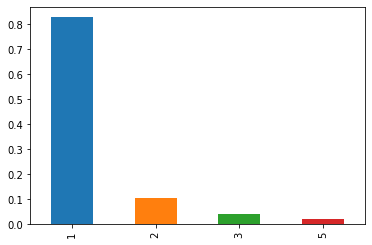

In [21]:
# Generate a bar plot of the percentage of each race in the population

print(f"Unique values in BENE_RACE_CD column are {df['BENE_RACE_CD'].unique()}")
(df['BENE_RACE_CD'].value_counts(normalize=True)).plot.bar()

Unique values in PLAN_CVRG_MOS_NUM column are [12  0  8  5 10  7 11  2  4  9  3  6  1]


<AxesSubplot:>

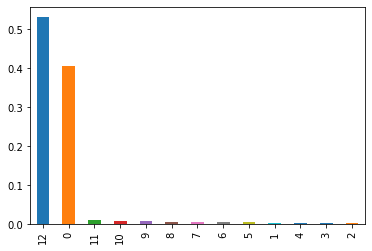

In [11]:
# Generate a bar plot of the percentage of plan coverage

print(f"Unique values in PLAN_CVRG_MOS_NUM column are {df['PLAN_CVRG_MOS_NUM'].unique()}")
(df['PLAN_CVRG_MOS_NUM'].value_counts() / df.shape[0]).plot.bar()

Unique values in SP_STATE_CODE column are [26 39  6 52 33 24 23  1 15 44 41 14 13 34 50 46 22 25 32  3 54 38 20 36
  5 10 18 45 12 27 51 49 37 21 31 11 30  7  4 19  8  2 42 16 17 43  9 47
 35 53 29 28]


<AxesSubplot:>

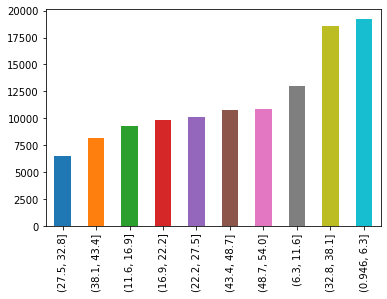

In [24]:
# Generate a bar plot of the distribution of patients across different states
# bins parameter is used to group the values together.

print(f"Unique values in SP_STATE_CODE column are {df['SP_STATE_CODE'].unique()}")
(df['SP_STATE_CODE'].value_counts(bins=10, ascending=True)).plot.bar()

In [31]:
# What is the median age as of December 31, 2019?

import datetime

end = datetime.datetime.strptime('2019-12-31', '%Y-%m-%d')
begin = pd.to_datetime(df['BENE_BIRTH_DT'], format='%Y%m%d')
#print(f'{end-begin}')
age = (end - begin) / np.timedelta64(12, 'M')
print(f'Median age is {age.median()} years.')

Median age is 83.6677002265618 years.


In [25]:
print(f'What is shape {df.shape[0]}')

What is shape 116352
